<style type="text/css">
#image {
  float:left;
  border-right:1px;
  width:145px;
  height:145px;
  margin-top:1px;
  margin-left:50px;
  padding:1px;
  background-color:#ffffff;
}
#subject {
  float:left;
  width:500px;
  border-radius: 10px; 
  height:130px;
  margin-top:6px;
  padding:1px;
  background-color:#b0bc04;
}
</style>

<div id="image">
<img src="https://www.imt-atlantique.fr/sites/default/files/ecole/IMT_Atlantique_logo.png" WIDTH=240 HEIGHT=240>
</div>
<div id="subject">
<CENTER>
</br>

<font size="5">TAF MCE - UE Computer Vision | Lab Session 1 : Introduction to computer vision </font></br></div>

<CENTER>
P.-H. Conze <span style="color:blue">pierre-henri.conze@imt-atlantique.fr</span> - 
V. Burdin <span style="color:blue">valerie.burdin@imt-atlantique.fr</span>
<CENTER>
</CENTER>
</div> 

This lab session is an introduction to image processing and computer vision. 

We will see how to manipulate images in Python, using two libraries: **scikit-image** (http://scikit-image.org) and **openCV** (https://docs.opencv.org/3.0-beta/index.html). 

In particular, four topics will be studied and discussed : 
1. reading/writing images
2. image pre-processing
3. introduction to geometric transformations
4. application to image mosaicing

In [1]:
import skimage
import os
retval = os.getcwd()
os.chdir(skimage.data_dir)
print('The folder', skimage.data_dir, 'contains sample images')

('The folder', '/Users/conze/anaconda/lib/python2.7/site-packages/skimage/data', 'contains sample images')


## I - Reading/writing images

You can open an image file (jpg, png, tiff...) as a numpy array with the **skimage.io.imread()** function. Images can also be read using the **cv2.imread()** function of openCV. The image must be in the working directory unless a full path to the image must be given as an argument.

The second argument of the **cv2.imread()** function is a flag that specifies how the image should be read:
* **cv2. IMREAD_COLOR**: loads a color image (default flag).
* **cv2. IMREAD_GRAYSCALE**: loads the image in grayscale.
* **cv2. IMREAD_UNCHANGED**: loads the image itself, including the alpha channel.

Note that instead of these flags, you can simply pass the integers 1, 0 or -1 respectively.

In [2]:
from skimage import io
import cv2

moon        = io.imread('moon.png')
moon_cv     = cv2.imread('moon.png', cv2.IMREAD_GRAYSCALE)
astronaut   = io.imread('astronaut.png')
astronaut_2 = io.imread('astronaut.png', as_gray=True)
astronaut_3 = skimage.img_as_ubyte(io.imread('astronaut.png', as_gray=True))

/Users/conze/anaconda/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


Let us display these images using the **plt.imshow()** function.

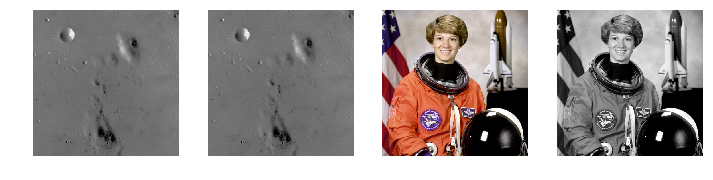

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(141)
plt.imshow(moon, cmap='gray')
plt.axis('off')
plt.subplot(142)
plt.imshow(moon_cv, cmap='gray')
plt.axis('off')
plt.subplot(143)
plt.imshow(astronaut)
plt.axis('off')
plt.subplot(144)
plt.imshow(astronaut_2, cmap='gray')
plt.axis('off')
plt.show()

**Question 1 -** Print the size, type, min and max values for each of the images read above.

In [4]:
import numpy as np

for img in [moon, moon_cv, astronaut, astronaut_2, astronaut_3]:
    print(img.shape, type(img[0,0]), np.min(img), np.max(img))

((512, 512), <type 'numpy.uint8'>, 0, 255)
((512, 512), <type 'numpy.uint8'>, 0, 255)
((512, 512, 3), <type 'numpy.ndarray'>, 0, 255)
((512, 512), <type 'numpy.float64'>, 0.0, 1.0)
((512, 512), <type 'numpy.uint8'>, 0, 255)


Image arrays are usually either integer arrays or floating point arrays. Most image formats store pixel values as integers. The most classic format corresponds to 8-bit integers (between 0 and 255), which corresponds to the **np.uint8** numpy type (8-bit unsigned integer).

However, it is natural to use floats when performing operations on pixels in real space, such as multiplications or divisions by real numbers. Some scikit-image functions for example return an array of a different type than the input array.

The functions **skimage.img_as_float()** and **skimage.img_as_ubyte()** allow conversion between types without worrying about scaling.

Displaying images can be done with **io.imshow()** as well as **plt.imshow()**.

** Question 2 -** Save the numpy array corresponding to the moon image as an image file using **io.imsave()** from scikit-image and **cv2.imwrite()** from openCV.

In [5]:
io.imsave(retval+'/save-1.png', moon)
cv2.imwrite(retval+'/save-2.png', moon)

True

## II - Image pre-processing

A common pre-processing technique is **histogram equalization** which aims at spreading out the most frequent intensity values in low contrast images. Although histogram equalization has the advantage that it does not require any parameters, it sometimes produces unnatural-looking images. 

Another method is **contrast stretching**, where the image is resized to include all intensities in the 2nd and 98th percentiles, for example.

In [6]:
from skimage import exposure

# equalization
moon_eq = exposure.equalize_hist(moon)

# contrast stretching
p2, p98 = np.percentile(moon, (2, 98))
moon_rescale = exposure.rescale_intensity(moon, in_range=(p2, p98))

In [7]:
from skimage import img_as_float

def plot_img_and_hist(image, axes, bins=256):

    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf

** Question 3 -** Analyze and execute the code below. Comment on the resulting figures. Which is the model followed by the cumulative distribution function after histogram equalization? 

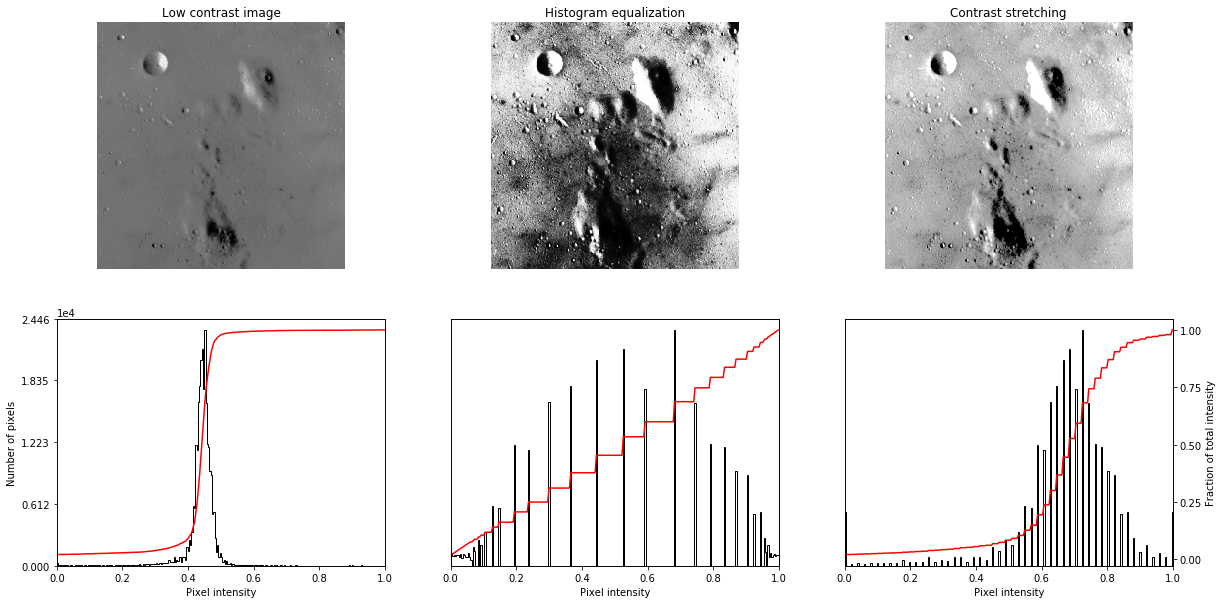

In [8]:
# Display results
fig = plt.figure(figsize=(20, 10))
axes = np.zeros((2, 4), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 3, 1)
for i in range(1, 3):
    axes[0, i] = fig.add_subplot(2, 3, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 3):
    axes[1, i] = fig.add_subplot(2, 3, 4+i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(moon, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(moon_eq, axes[:, 1])
ax_img.set_title('Histogram equalization')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(moon_rescale, axes[:, 2])
ax_img.set_title('Contrast stretching')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

plt.show()

**Answer:** The equalized image has a (roughly) linear cumulative distribution function.

Let us add some noise to the astronaut image.

In [9]:
import numpy as np

astronaut = skimage.img_as_float(astronaut)
noisy = astronaut + 0.4 * np.random.random(astronaut.shape)
noisy = np.clip(noisy, 0, 1)

It is sometimes necessary to use image **filtering** or **denoising** methods before considering any processing. 

OpenCV provides a **cv2.filter2D(img,depth,kernel)** function to convolve the image with a kernel to be defined beforehand. **depth** corresponds to the depth of the output image (if negative, it will be the same as **img**)

**Question 4 -** Apply a 5x5 averaging filter to the noisy image of the astronaut.

In [10]:
kernel = np.ones((5,5),np.float32)/25
denoise_moy = cv2.filter2D(noisy,-1,kernel)

The denoising can also be carried out by bilateral or non-local means filtering. 

** Question 5 -** Perform both types of filtering using the **denoise_bilateral()** and **denoise_nl_means()** functions from **skimage.restoration** (http://scikit-image.org/docs/dev/api/skimage.restoration.html). Describe each of these filtering techniques. Display and compare the results visually.

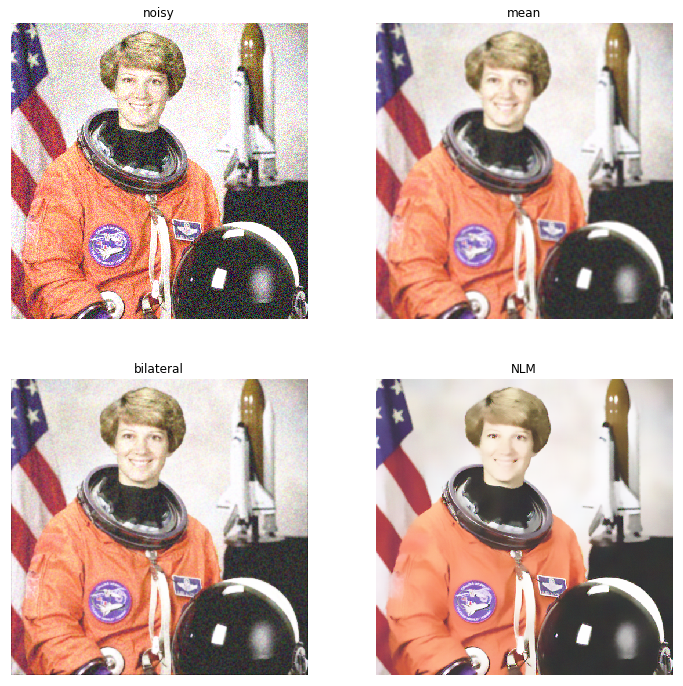

In [11]:
from skimage.restoration import denoise_bilateral, denoise_nl_means

denoise_nlm = denoise_nl_means(noisy, multichannel=True)
denoise_bil = skimage.restoration.denoise_bilateral(noisy, multichannel=True)

plt.figure(figsize=(12, 12))
plt.subplot(2,2,1),plt.imshow(noisy,cmap = 'gray')
plt.title('noisy'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(2,2,2),plt.imshow(denoise_moy,cmap = 'gray')
plt.title('mean'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(2,2,3),plt.imshow(denoise_bil,cmap = 'gray')
plt.title('bilateral'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(2,2,4),plt.imshow(denoise_nlm,cmap = 'gray')
plt.title('NLM'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.show()

** Answer:** Bilateral filtering replaces the intensity of each pixel with a weighted average of the intensity values of neighbouring pixels. These weights depend on the Euclidean distance of the pixels and the intensity differences. 

Unlike usual filters which average the values of the group of pixels located around a target pixel, non-local means or patch denoising averages the values of pixels located elsewhere in the image (not necessarily in the vicinity of the current pixel), weighted according to the similarity between the current and target patches.

** Question 6 -** Compute and display the images corresponding to the horizontal and vertical gradients of the astronaut image (in grayscale) using the functions **sobel_h** and **sobel_v** from **skimage.filters** (http://scikit-image.org/docs/dev/api/skimage.filters.html). These operations can be also performed using **cv.Sobel()** (https://docs.opencv.org/3.0-beta/modules/imgproc/doc/filtering.html#sobel).

In [12]:
from skimage import filters

sobelx_cv = cv2.Sobel(astronaut_3,cv2.CV_64F,0,1,ksize=5) # order of derivatives in x and y to be indicated! 
sobely_cv = cv2.Sobel(astronaut_3,cv2.CV_64F,1,0,ksize=5)
sobelx_sk = filters.sobel_h(astronaut_3)
sobely_sk = filters.sobel_v(astronaut_3)

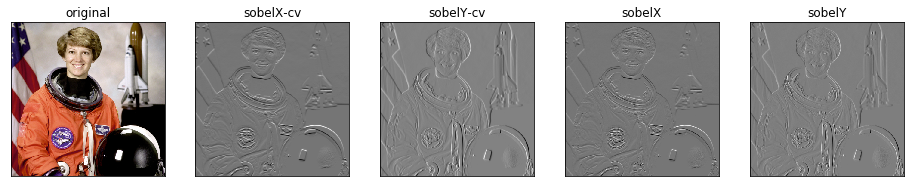

In [13]:
plt.figure(figsize=(16, 16))
plt.subplot(1,5,1),plt.imshow(astronaut, cmap = 'gray')
plt.title('original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,5,2),plt.imshow(sobelx_cv,cmap = 'gray')
plt.title('sobelX-cv'), plt.xticks([]), plt.yticks([])
plt.subplot(1,5,3),plt.imshow(sobely_cv,cmap = 'gray')
plt.title('sobelY-cv'), plt.xticks([]), plt.yticks([])
plt.subplot(1,5,4),plt.imshow(sobelx_sk,cmap = 'gray')
plt.title('sobelX'), plt.xticks([]), plt.yticks([])
plt.subplot(1,5,5),plt.imshow(sobely_sk,cmap = 'gray')
plt.title('sobelY'), plt.xticks([]), plt.yticks([])
plt.show()

## III - Introduction to geometric transformations

Several types of parametric geometric transformations can be considered in computer vision: rigid, similarity, affine or projective.

A rigid transformation is composed of a translation and a rotation allowing to reposition an object supposedly rigid. A similarity is a transformation that includes an isotropic scale factor in addition to translation and rotation. An affine transformation allows, in addition to rotation and translation, an anisotropic scale factor and shear modeling. A projective transformation is mainly used to take into account perspective effects in the image. 

Let us execute the code below.

[[ 1.01490425  0.09783675  0.        ]
 [-0.10183008  0.97510408  0.        ]
 [ 0.          0.          1.        ]]
[[ 1.01490425  0.09783675  0.        ]
 [-0.10183008  0.97510408 80.        ]
 [ 0.          0.          1.        ]]


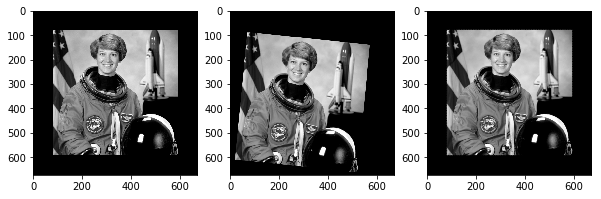

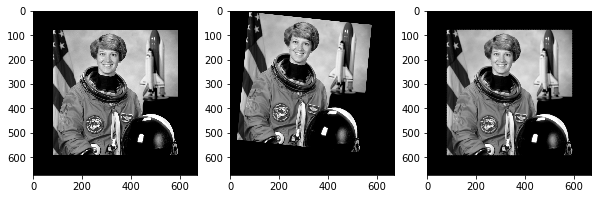

In [14]:
from skimage.transform import AffineTransform, warp
from skimage import util

astronaut = util.pad(astronaut_3, 80, 'constant')

# ----                    
tform = AffineTransform(scale=(1.02,0.98), rotation=-0.1)
print(tform.params)

rotated = warp(astronaut, tform) # forward
back_rotated = warp(rotated, tform.inverse) # inverse

f, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(10, 5))
ax1.imshow(astronaut, cmap=plt.cm.gray)
ax2.imshow(rotated, cmap=plt.cm.gray)
ax3.imshow(back_rotated, cmap=plt.cm.gray)
# ---- 

# ----
matrix = tform.params
matrix[1, 2] = 80
print(matrix)
tform = AffineTransform(matrix)

rotated = warp(astronaut, tform)
back_rotated = warp(rotated, tform.inverse)

f, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(10, 5))
ax1.imshow(astronaut, cmap=plt.cm.gray)
ax2.imshow(rotated, cmap=plt.cm.gray)
ax3.imshow(back_rotated, cmap=plt.cm.gray)
# ---- 

plt.show()

**How can geometric transformations be generated?** Geometrical transformations can be created using explicit parameters (translation, rotation, scaling, shear...) or the transformation matrix directly. In the above code, we note that the affine transformation is used in direct and inverse mode between the coordinate systems of both source and destination images.

Similarly, openCV provides two transformation functions: **cv2.warpAffine()** and **cv2.warpPerspective()** with which all kinds of parametric transformations can be performed. **cv2.warpAffine()** takes a 2x3 transformation matrix as input, while **cv2.warpPerspective()** takes a 3x3 transformation matrix. For more information: http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html#geometric-transformations

In addition to the basic features mentioned above, it is possible to estimate the parameters of a geometric transformation using the least squares method when we have a set of matched points in two images. 

Suppose we want to extract a logo from a picture that was not acquired from the front but with a certain angle. In the simplest case of a flat surface, the content of the logo is deformed projectively. One can therefore try to apply a distortion to the area of the image corresponding to the logo in order to remove the distortion.

** Question 7 -** Carry out the extraction and deformation (towards the image plane) of the IMT Atlantique logo from the **imta.jpg** image provided by completing the code below.

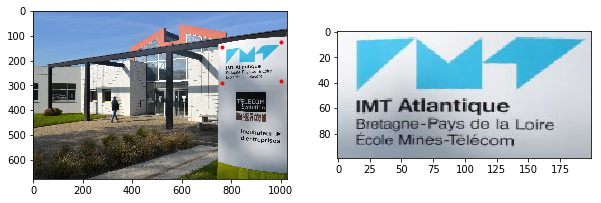

In [15]:
from skimage.transform import ProjectiveTransform

imt_img =  io.imread(retval+'/imta.jpg')

coord0 = np.array([[0, 0], [0, 100], [200, 100], [200, 0]])
coord1 = np.array([[763, 147], [763, 289], [1000, 281], [1000, 126]])

tform = ProjectiveTransform()
tform.estimate(coord0, coord1)
warped = warp(imt_img, tform,output_shape=(100, 200))

fig, ax = plt.subplots(ncols=2, figsize=(10, 10))

ax[0].imshow(imt_img, cmap=plt.cm.gray)
ax[0].plot(coord1[:, 0], coord1[:, 1], '.r')
ax[1].imshow(warped, cmap=plt.cm.gray)

plt.show()

## IV - Application to image mosaicing

You have three images (pano0.jpg, pano1.jpg, pano2.jpg) of the same landscape but acquired from different viewpoints. The objective is to combine the content of these three images into a single **panoramic image**. We will exploit for this purpose the estimation of geometrical transformations through the matching of feature points extracted in each of the three images.

Let us read and display these 3 images.

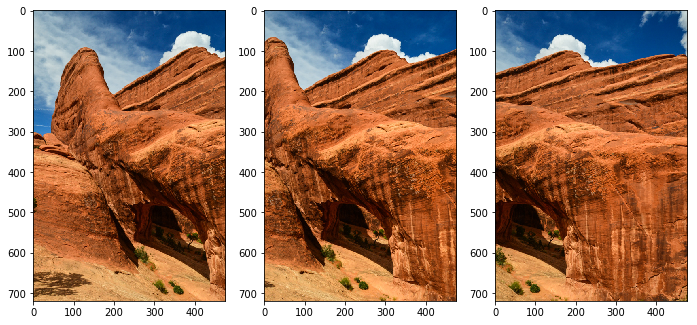

In [16]:
from skimage import io

pano0 = io.imread(retval+'/pano0.jpg')
pano1 = io.imread(retval+'/pano1.jpg')
pano2 = io.imread(retval+'/pano2.jpg')

plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate([pano0,pano1,pano2]):
    plt.subplot(3 / columns + 1, columns, i + 1)
    plt.imshow(image)
plt.show()

**ORB feature points** are an effective alternative to SIFT or SURF, particularly in terms of computation cost and performance. Moreover, ORB is not subject to the limitations encountered with SIFT and SURF which are patented. 

For more information: http://www.willowgarage.com/sites/default/files/orb_final.pdf

** Question 8 -** Complete the code below for the detection of OBR feature points in pano0, pano1 and pano2 images.

In [17]:
from skimage.feature import ORB
from skimage.color import rgb2gray

# ORB detector initialization
orb = ORB(n_keypoints=800, fast_threshold=0.05) 
# 800 interest points are enough to obtain good results without unnecessarily increasing computational complexity

orb.detect_and_extract(rgb2gray(pano0))
keypoints0 = orb.keypoints
descriptors0 = orb.descriptors

orb.detect_and_extract(rgb2gray(pano1))
keypoints1 = orb.keypoints
descriptors1 = orb.descriptors

orb.detect_and_extract(rgb2gray(pano2))
keypoints2 = orb.keypoints
descriptors2 = orb.descriptors

** Question 9 -** Match the ORB features points for pano0/pano1 and pano1/pano2 image pairs using the **match_descriptors()** function from **skimage.feature** (http://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.match_descriptors).

In [18]:
from skimage.feature import match_descriptors

matches01 = match_descriptors(descriptors0, descriptors1, cross_check=True)
matches21 = match_descriptors(descriptors2, descriptors1, cross_check=True)

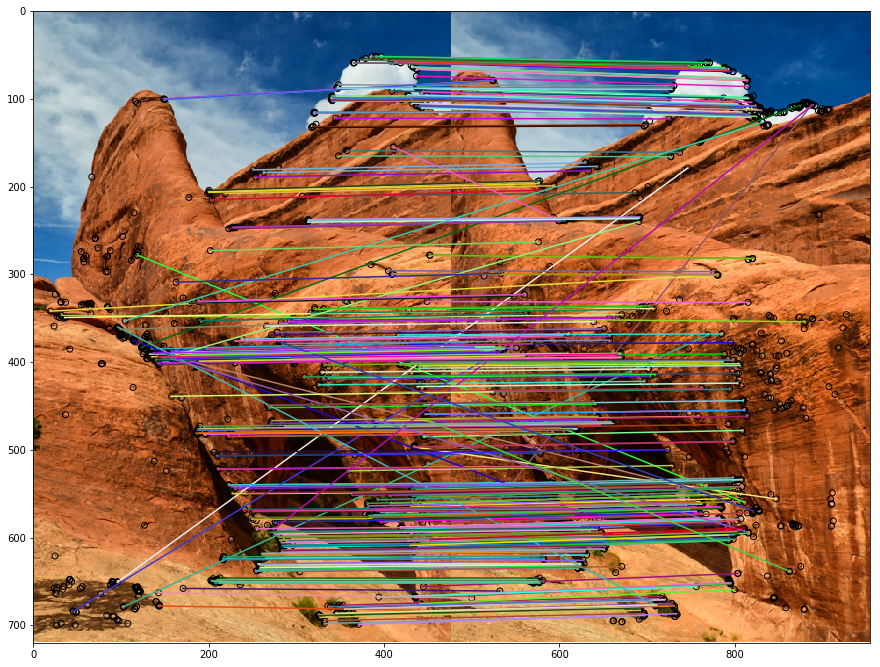

In [19]:
from skimage.feature import plot_matches
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(15, 12))
plot_matches(ax, pano0, pano1, keypoints0, keypoints1, matches01)
plt.show()

In [20]:
print(keypoints0)

[[579.  389. ]
 [ 57.  408. ]
 [ 56.4 408. ]
 ...
 [541.2 435.6]
 [404.  424. ]
 [596.  275. ]]


In [21]:
print(matches01)

[[  0   1]
 [  3  17]
 [  4   3]
 [  5  20]
 [  6  18]
 [  8   5]
 [ 10   8]
 [ 11   6]
 [ 12   4]
 [ 13  85]
 [ 14  15]
 [ 16  16]
 [ 17   7]
 [ 19  52]
 [ 20  30]
 [ 21  38]
 [ 22  11]
 [ 23  35]
 [ 24 162]
 [ 25  84]
 [ 27  26]
 [ 28  93]
 [ 29  73]
 [ 31  32]
 [ 32  31]
 [ 33  41]
 [ 34  29]
 [ 35  43]
 [ 36  94]
 [ 38   9]
 [ 39 135]
 [ 40  59]
 [ 41  64]
 [ 42 191]
 [ 43  49]
 [ 44 115]
 [ 45  42]
 [ 47 104]
 [ 48  44]
 [ 50 258]
 [ 53  62]
 [ 54 114]
 [ 55  22]
 [ 56  96]
 [ 57 139]
 [ 58  72]
 [ 61 530]
 [ 62 172]
 [ 63  65]
 [ 64  47]
 [ 65 221]
 [ 67 311]
 [ 68 133]
 [ 69 275]
 [ 70 203]
 [ 71 117]
 [ 72  92]
 [ 73 323]
 [ 75 121]
 [ 76 549]
 [ 77  75]
 [ 78 112]
 [ 79 245]
 [ 80 182]
 [ 81 217]
 [ 82  91]
 [ 83 105]
 [ 84 170]
 [ 86 225]
 [ 87 430]
 [ 89 263]
 [ 90  97]
 [ 93 391]
 [ 94 220]
 [ 97 247]
 [100  77]
 [101 122]
 [102 168]
 [103 345]
 [105 228]
 [106 186]
 [107 211]
 [108 201]
 [109 111]
 [112 234]
 [115 604]
 [116 232]
 [117 231]
 [118 187]
 [120 647]
 [121 196]

** Question 10 -** Estimation of motion models for pano0/pano1 and pano1/pano2 image pairs using **RANSAC** (RANdom SAmple Consensus, http://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.ransac). Analyze, run and comment the code below.

In [22]:
from skimage.measure import ransac

src = keypoints0[matches01[:, 0]][:, ::-1]
dst = keypoints1[matches01[:, 1]][:, ::-1]

model_robust01, inliers01 = ransac((src, dst), ProjectiveTransform,
                                   min_samples=4, residual_threshold=1, max_trials=300) # a

src = keypoints2[matches21[:, 0]][:, ::-1]
dst = keypoints1[matches21[:, 1]][:, ::-1]

model_robust21, inliers21 = ransac((src, dst), ProjectiveTransform,
                                   min_samples=4, residual_threshold=1, max_trials=300) # b

In [23]:
import numpy as np

r, c = pano1.shape[:2] # c

corners = np.array([[0, 0],
                    [0, r],
                    [c, 0],
                    [c, r]])

# d
warped_corners01 = model_robust01(corners)
warped_corners21 = model_robust21(corners)

all_corners = np.vstack((warped_corners01, warped_corners21, corners))

# e
corner_min = np.min(all_corners, axis=0)
corner_max = np.max(all_corners, axis=0)
output_shape = (corner_max - corner_min)

# f
output_shape = np.ceil(output_shape[::-1]).astype(int)

In [24]:
from skimage.transform import SimilarityTransform

# g
offset1 = SimilarityTransform(translation= -corner_min)

In [25]:
# h
transform01 = (model_robust01 + offset1).inverse  
pano0_warped = warp(pano0, transform01, order=3,
                    output_shape=output_shape, cval=-1)

# i
pano0_mask = (pano0_warped != -1) 
pano0_warped[~pano0_mask] = 0

**Answers:**

a - model from pano0 to pano1 (**model_robust01**) <br/>
b - model from pano2 to pano1 (**model_robust21**) <br/>
c - dimension of the middle image <br/>
d - image corners "warped" to their new positions <br/>
e - the size of the panoramic image will be max - min <br/>
f - make sure that the dimensions are integer with np.ceil and conversion type <br/>
g - transformation (**offset1**) for the middle image <br/>
h - warping from pano0 to pano1, interpolation of order 3 <br/>
i - mask == 1 in the image, background value at 0

** Question 11 -** Perform the warping from pano1/pano2 to the panoramic image based on the example provided above for pano0.

In [26]:
# warping of pano1 to the panoramic image
pano1_warped = warp(pano1, offset1.inverse, order=3,
                    output_shape=output_shape, cval=-1)

pano1_mask = (pano1_warped != -1)
pano1_warped[~pano1_mask] = 0

In [27]:
# warping from pano2 to the panoramic image
transform21 = (model_robust21 + offset1).inverse
pano2_warped = warp(pano2, transform21, order=3,
                    output_shape=output_shape, cval=-1)

pano2_mask = (pano2_warped != -1)
pano2_warped[~pano2_mask] = 0

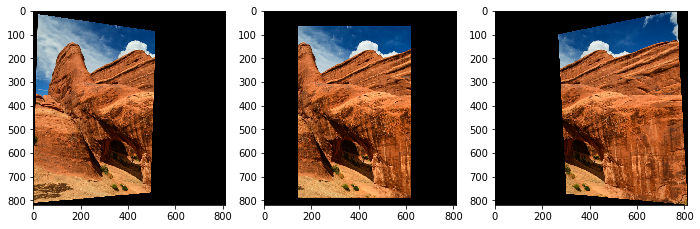

In [28]:
plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate([pano0_warped,pano1_warped,pano2_warped]):
    plt.subplot(3 / columns + 1, columns, i + 1)
    plt.imshow(image)
plt.show()

**Question 12 -**  Which processing is required to accurately put together the warping images? Comment the code below.

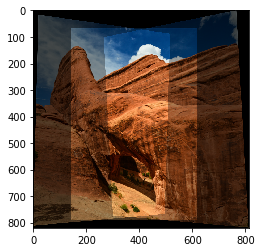

In [29]:
merged = (pano0_warped + pano1_warped + pano2_warped) # a
plt.imshow(merged/3, cmap='gray')
plt.show()

In [30]:
# b
overlap = (pano0_mask * 1. +  # c
           pano1_mask + 
           pano2_mask)

# d
normalized = merged / np.maximum(overlap, 1)

**Answers**

a - add warped images <br/>
b - addition of the masks <br/>
c - conversion from bool to float <br/>
d - normalization through division by overlap (minimum at 1)

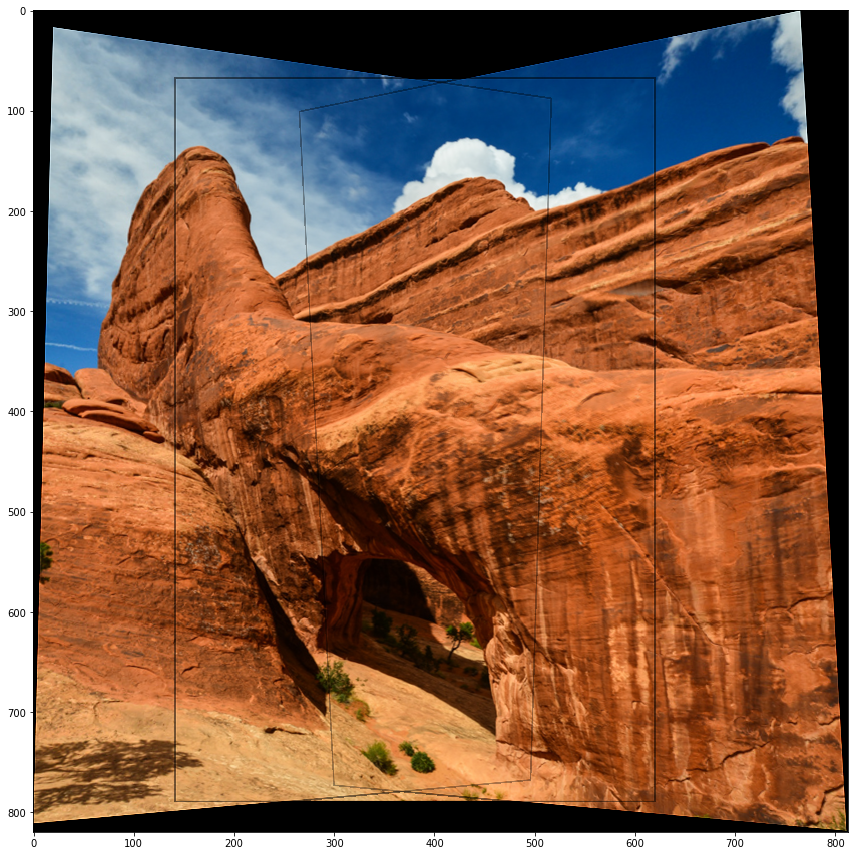

In [31]:
fig, ax = plt.subplots(figsize=(15, 12))
ax.imshow(normalized, cmap='gray')
plt.tight_layout()
plt.show()